# IPL Data Analysis & Visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
match_data = pd.read_csv('IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

# Data Preparation and cleaning
We will be using various libraries such as Numpy, Seaborn, Pandas & Matplotlib 

In [3]:
match_data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
#Check if there is any null values in match data set
#We can use .isnull() to set Null values to True and then use .sum() to calculate all the null values

match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
 ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
#The Describe method give us the overview of our data in rows & in columns

match_data.describe

<bound method NDFrame.describe of           id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                            

In [8]:
match_data.shape

(816, 17)

In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
#We seeing the number of matches that has been played and which cities. And more inportantly, 
#teams that participated

print('Match played so far:', match_data.shape[0])

print("\n cities played at:", match_data['city'].unique())

print('\n Teams participated: ' , match_data['team1'].unique())

Match played so far: 816

 cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams participated:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [11]:
#Season and number of matches 

match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [12]:
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns = {'id': 'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


/home/shushant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total matchs played in each season')

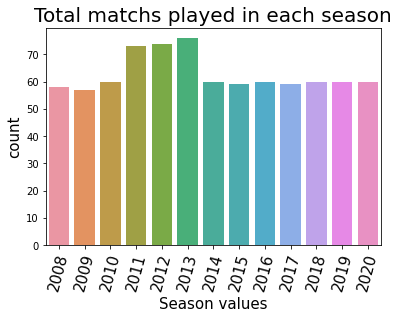

In [13]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize= 10)
plt.xlabel('Season values', fontsize= 15)
plt.ylabel('count', fontsize= 15)
plt.title("Total matchs played in each season", fontsize=20, fontweight ="normal")

In [14]:
season_data=match_data[['id', 'Season']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()       


,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


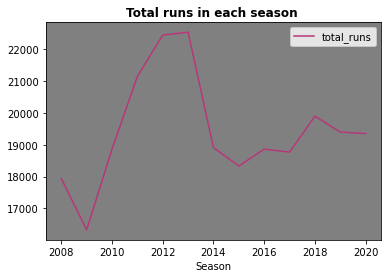

In [15]:
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p = season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.lineplot(data= p, palette = 'magma' )
plt.title('Total runs in each season ',fontsize = 12, fontweight="bold")
plt.show()

In [16]:
runs_per_season=pd.concat([match_per_season, season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace = True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


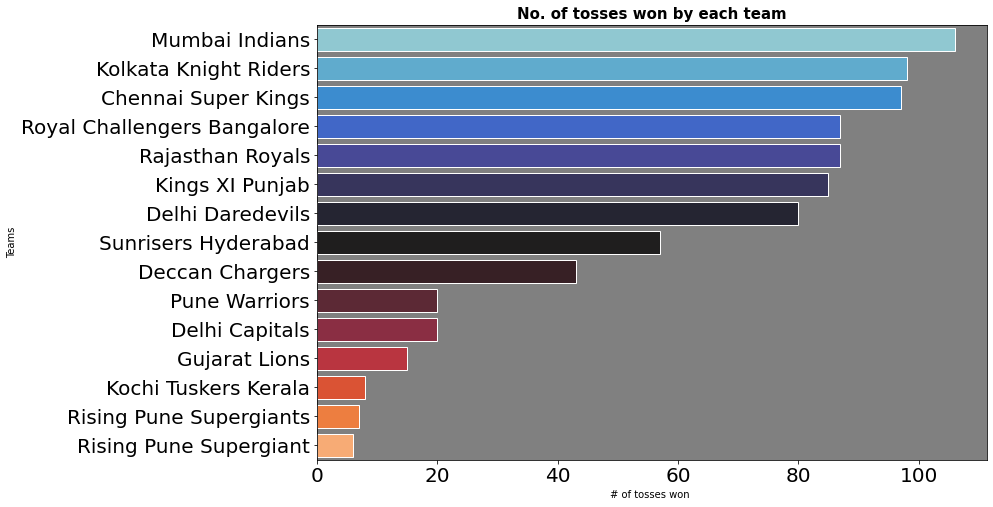

In [17]:
plt.figure(figsize=(12,8))
toss = match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(6,4)}, style = 'darkgrid')
ax.set_title('No. of tosses won by each team', fontsize =15, fontweight="bold")
plt.tick_params(labelsize=20)
sns.barplot(y=toss.index, x =toss, orient="h", palette="icefire", saturation =1)
plt.xlabel('# of tosses won ')
plt.ylabel('Teams')
plt.show()

Text(0, 0.5, 'Count')

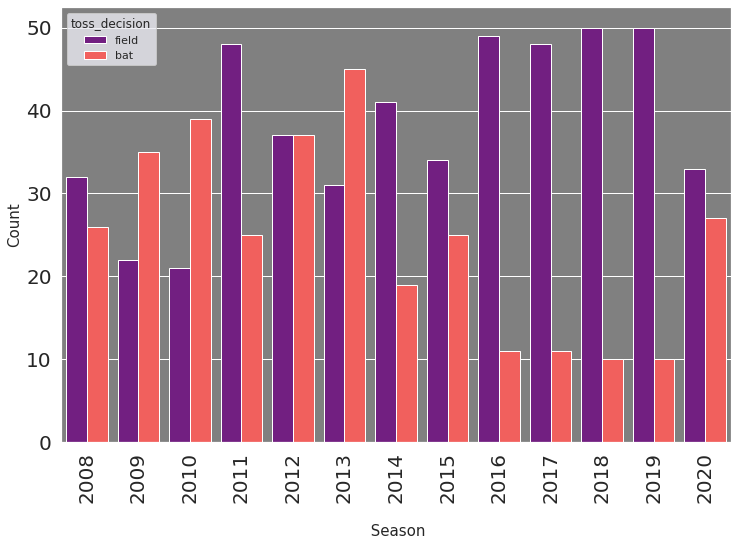

In [18]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x= 'Season', hue = 'toss_decision', data= match_data, palette = 'magma', saturation= 1)
plt.xticks(rotation=90, fontsize =10)
plt.yticks(fontsize=15)
plt.tick_params(labelsize=20)
plt.xlabel("\n Season", fontsize =15)
plt.ylabel('Count', fontsize= 15)


In [19]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [20]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [21]:
match_data.venue[match_data.result!='wickets'].mode()

0    Feroz Shah Kotla
dtype: object

In [22]:
match_data.venue[match_data.toss_winner== "Mumbai Indians"][match_data.winner== "Mumbai Indians"].mode()

match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [23]:
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
dtype: object

/home/shushant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


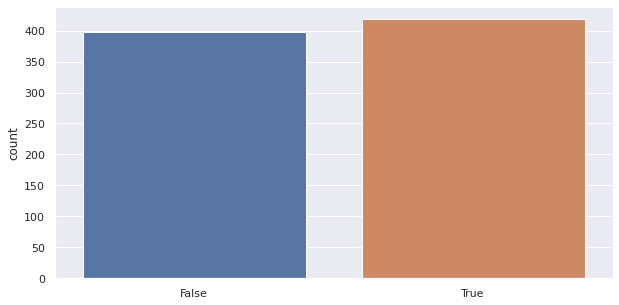

In [24]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()


/home/shushant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


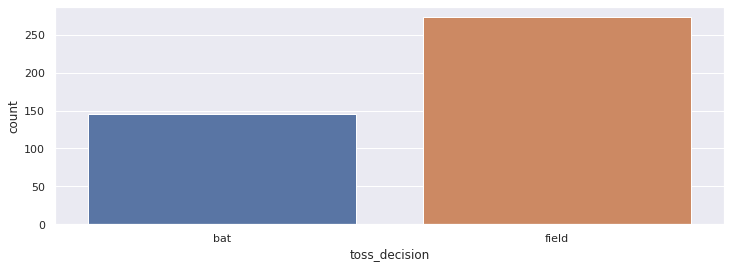

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

In [26]:
player = (ball_data['batsman'] == 'AB de Villiers')
df_raina = ball_data[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
4547,336001,2,12,3,AB de Villiers,G Gambhir,M Muralitharan,2,0,2,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Chennai Super Kings
4548,336001,2,12,4,AB de Villiers,G Gambhir,M Muralitharan,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Chennai Super Kings
4549,336001,2,12,5,AB de Villiers,G Gambhir,M Muralitharan,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Chennai Super Kings
4551,336001,2,13,1,AB de Villiers,G Gambhir,Joginder Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Chennai Super Kings
4554,336001,2,13,4,AB de Villiers,G Gambhir,Joginder Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,Chennai Super Kings


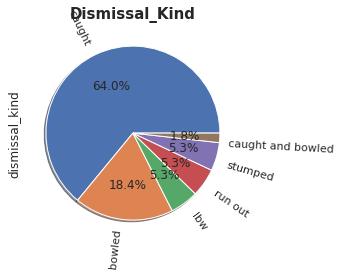

<Figure size 864x576 with 0 Axes>

In [27]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct= '%1.1f%%', shadow=True, rotatelabels=True)
plt.title("Dismissal_Kind",fontweight='bold',fontsize ='15')
plt.figure(figsize=(12,8))
plt.show()

In [28]:
def count(df_raina, runs):
    return len(df_raina[df_raina["batsman_runs"]==runs])*runs

In [29]:
print('Runs scored from 1s:', count(df_raina,1))
print('Runs scored from 2s:', count(df_raina,2))
print('Runs scored from 3s:', count(df_raina,3))
print('Runs scored from 4s:', count(df_raina,4))
print('Runs scored from 5s:', count(df_raina,5))
print('Runs scored from 6s:', count(df_raina,6))




Runs scored from 1s: 1333
Runs scored from 2s: 498
Runs scored from 3s: 48
Runs scored from 4s: 1560
Runs scored from 5s: 0
Runs scored from 6s: 1410


In [30]:
match_data[match_data['result_margin']== match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [31]:
runs =ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman', 'runs']
y = runs.sort_values(by= 'runs', ascending =False).head(10).reset_index().drop('index', axis= 1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

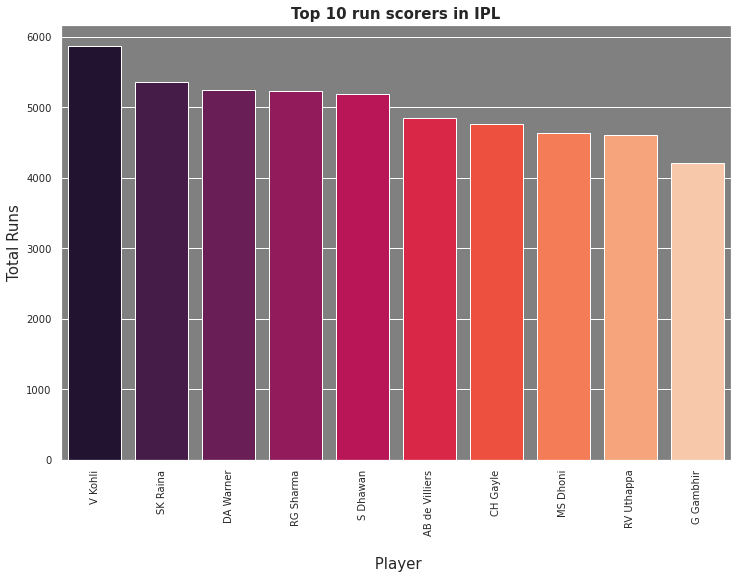

In [32]:
plt.figure(figsize=(12,8))

ax = plt.axes()
ax.set(facecolor = 'grey')
sns.barplot(x=y['Batsman'],y=y['runs'], palette='rocket', saturation =1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player', fontsize =15)
plt.ylabel('Total Runs', fontsize = 15)
plt.title('Top 10 run scorers in IPL', fontsize = 15 , fontweight = 'bold')


Text(0.5, 1.0, 'Highest MOM awards winners')

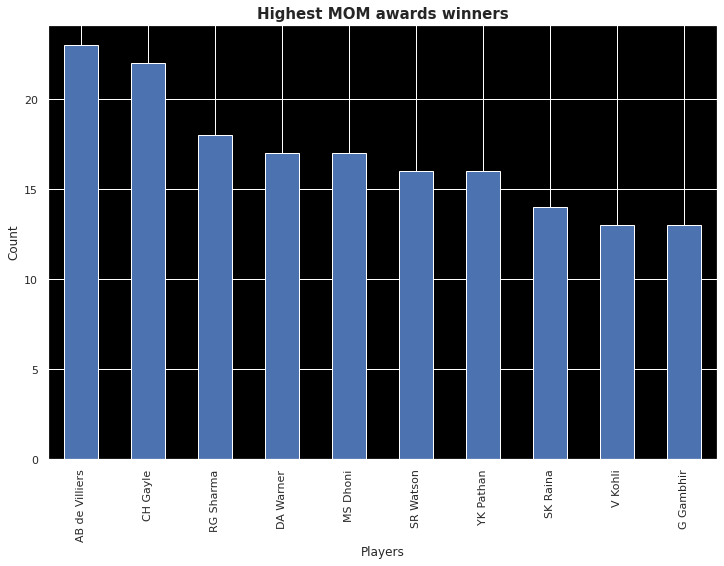

In [33]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set(facecolor = "black")
match_data.player_of_match.value_counts()[:10].plot(kind = 'bar')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title("Highest MOM awards winners", fontsize =15, fontweight = 'bold')

In [34]:
match_data.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [35]:
total_venue = list(match_data.venue.unique())
len(total_venue)

36

In [36]:
venue_df = match_data.groupby('venue')[['id']].count()
venue_df = venue_df.sort_values('id', ascending =False).reset_index()

venue_df.rename(columns= {'id': 'Total', 'venue': 'Stadium' },inplace=True)

In [37]:
labels = list(venue_df.Stadium)
venue_df

,Stadium,Total
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk",57
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


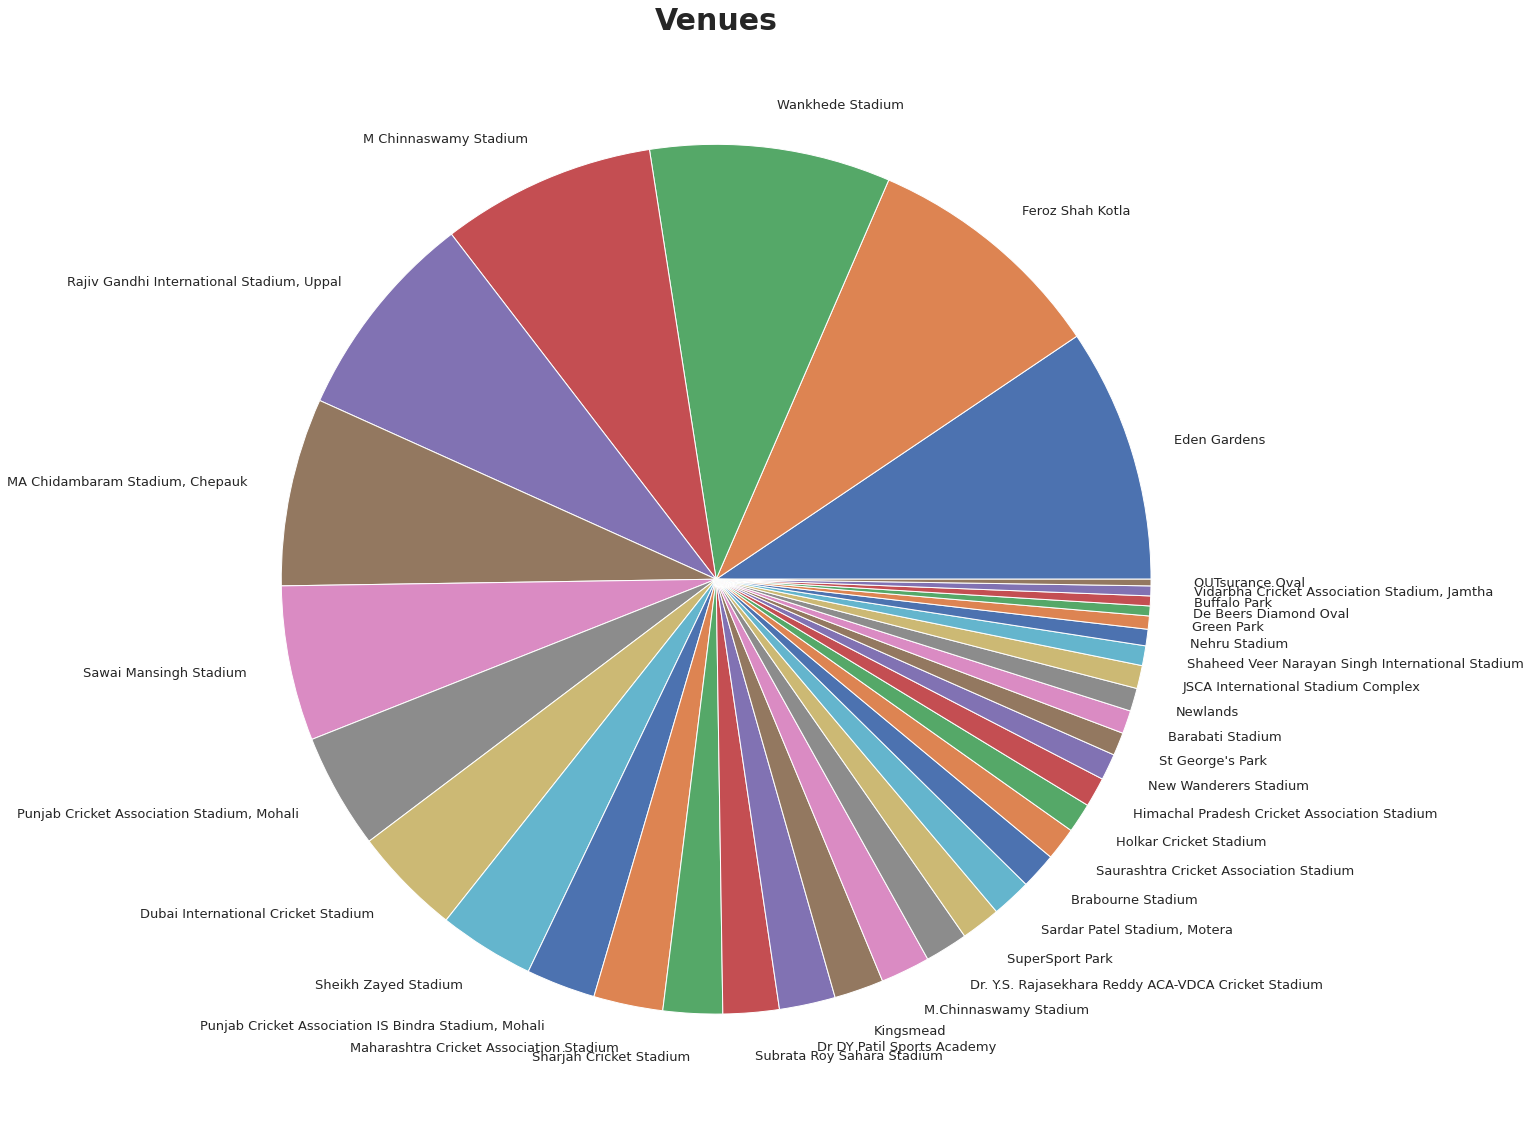

In [38]:
plt.figure(figsize=(20,20))
plt.title('Venues', fontweight ='bold', fontsize= 30)
plt.tick_params(labelsize=40)
plt.pie(venue_df.Total, labels = labels, textprops={'fontsize': 13});